## Gradient Descent
Use the gradient to select the next descent iteration $\mathbf{d}$. We define the gradient at the _k_-th iterate $\mathbf{x}_k$ to be $$\mathbf{g}_k=\nabla f(\mathbf{x}_k)$$
The motivation for GD comes from the first-order Taylor series approximation about out current iterate $\mathbf{d}_k$ $$f(\mathbf{x}_k+\alpha \mathbf{d})\approx f(\mathbf{d}_k)+\alpha \mathbf{d}^T\mathbf{g}_k$$
We can choose the direction d that minimizes this first-order approximation
subject to the constraint that $||\mathbf{d}||_2=1$ (this algorithm uses L2 norm but other algorithms may use another norm, see Boyd (2004)).

The direction that minimizes the first order approximation is the direction of _steepest descent_, which is simply the direction __opposite__ to the gradient.
$$\mathbf{d}_k=-\frac{\mathbf{g}_k}{||\mathbf{g}_k||_2}$$
_See Algorithms for Optimization 2024_ for more information like with momentum



Gradient Descent (α=0.002)
    Starting point: [-1.  1.]
    Final point [0.72810408 0.52886517]
    Function value: 0.0741
    Distance from true minimum (1, 1): 0.544
Momentum (α=0.002, β=0.9)
    Starting point: [-1.  1.]
    Final point [0.9999426  0.99988497]
    Function value: 0.0000
    Distance from true minimum (1, 1): 0.000


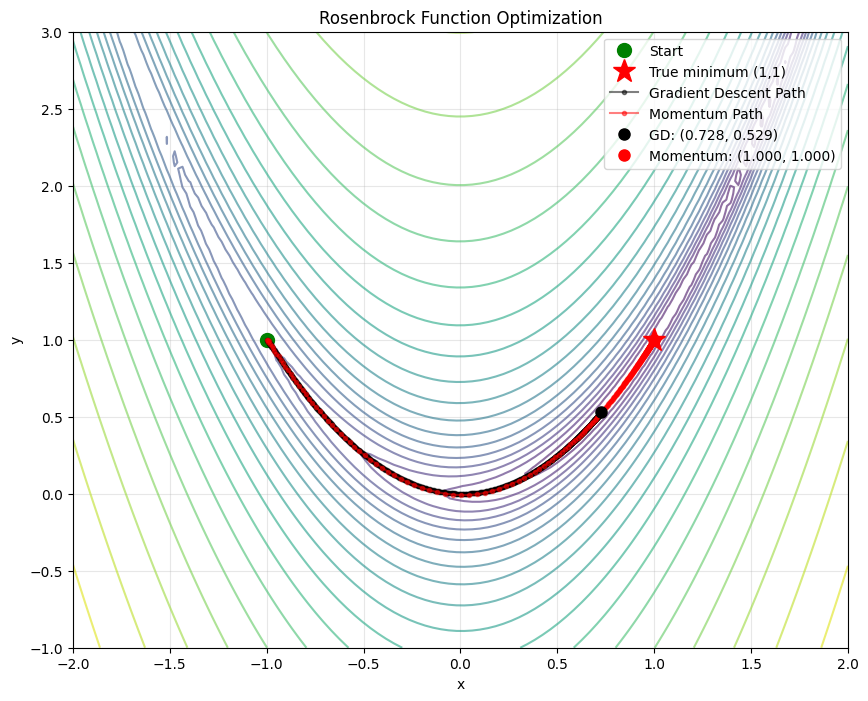

Gradient Descent final error: 0.543963
Momentum final error: 0.000129


In [ ]:
from abc import ABC, abstractmethod
import numpy as np
import matplotlib.pyplot as plt

class DescentMethod(ABC):
    @abstractmethod
    def init(self, f, grad_f, x0):
        """Initialize the descent method"""
        pass
    
    @abstractmethod
    def step(self, f, grad_f, x):
        """Perform one optimization step"""
        pass

def iterated_descent(method: DescentMethod, f, grad_f, x0, k_max=1000):
    """
    Perform iterative descent optimization
    
    Parameters:
    - method: DescentMethod instance
    - f: objective function
    - grad_f: gradient function
    - x0: initial point
    - k_max: maximum iterations
    """
    method.init(f, grad_f, x0)
    x = x0
    history = [x.copy()]
    for _ in range(k_max):
        x_new = method.step(f, grad_f, x)
        if np.linalg.norm(x_new - x) < 1e-8:
            break
        x = x_new
        history.append(x.copy())
    return x, np.array(history)

class GradientDescent(DescentMethod):
    def __init__(self, alpha=0.01):
        '''Initialize GD. alpha: step size/learning rate'''
        self.alpha = alpha
        
    def init(self, f, grad_f, x0):
        """No special initialization needed for basic gradient descent"""
        return self
    
    def step(self, f, grad_f, x):
        return x - self.alpha * grad_f(x)

class Momentum(DescentMethod):
    def __init__(self, alpha, beta, v):
        '''alpha: step factor, beta: momentum decay, v:momentum'''
        self.alpha = alpha
        self.beta = beta
        self.v = None
    
    def init(self, f, grad_f, x0):
        self.v = np.zeros(len(x0))
        return self

    def step(self, f, grad_f, x):
        '''Perform one momentum descent step'''
        self.v = self.beta * self.v + self.alpha * grad_f(x) # update momentum
        return x - self.v # update position

def rosenbrock(x):
    """Rosenbrock function: f(x,y) = (a-x)² + b(y-x²)² with a=1, b=100"""
    a, b = 1, 100 # as figure 5.5 from AFO
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

def rosenbrock_grad(x):
    """Gradient of Rosenbrock function"""
    a, b = 1, 100
    dx = -2*(a - x[0]) - 4*b*x[0]*(x[1] - x[0]**2)
    dy = 2*b*(x[1] - x[0]**2)
    return np.array([dx, dy])

def run_optim(method, f, grad_f, x0, k_max, method_name):
    result, history = iterated_descent(method, f, grad_f, x0, k_max)
    print(f'{method_name}')
    print(f'    Starting point: {x0}')
    print(f'    Final point {result}')
    print(f'    Function value: {f(result):.4f}')
    print(f'    Distance from true minimum (1, 1): {np.linalg.norm(result - np.array([1,1])):.3f}')
    return result, history

# --- parameters ---
x0 = np.array([-1.0, 1.0])
step_size = 0.002
mom_decay = 0.9
max_iter = 1000
# --- establish methods ---
gd = GradientDescent(alpha=step_size)
gdm = Momentum(alpha=step_size, beta=mom_decay, v=0.5)
# --- history ---
result_gd, history_gd = run_optim(gd, rosenbrock, rosenbrock_grad,
                       x0, 1000, f"Gradient Descent (α={step_size})")
result_gdm, history_gdm = run_optim(gdm, rosenbrock, rosenbrock_grad,
                       x0, 1000, f"Momentum (α={step_size}, β={mom_decay})")
# --- plot ---
plt.figure(figsize=(10,8))
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = (1 - X)**2 + 100 * (Y - X**2)**2
# --- countor plot (isovalues) ---
plt.contour(X,Y, np.log(Z+1), levels=20, alpha=0.6)
plt.plot(x0[0], x0[1], 'go', markersize=10, label='Start')
plt.plot(1,1, 'r*', markersize=17, label='True minimum (1,1)')
# --- path of the method ---
plt.plot(history_gd[:,0], history_gd[:,1], '.-', color='black', alpha=0.5,
         label='Gradient Descent Path') # optimization history
plt.plot(history_gdm[:,0], history_gdm[:,1], '.-', color='red', alpha=0.5,
         label='Momentum Path')
# --- final points of the methods ---
plt.plot(result_gd[0], result_gd[1], 'o', color='black', markersize=8,
         label=f'GD: ({result_gd[0]:.3f}, {result_gd[1]:.3f})') # final points
plt.plot(result_gdm[0], result_gdm[1], 'o', color='red', markersize=8,
         label=f'Momentum: ({result_gdm[0]:.3f}, {result_gdm[1]:.3f})')
# --- personalization ---
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rosenbrock Function Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"Gradient Descent final error: {np.linalg.norm(result_gd - np.array([1,1])):.6f}")
print(f"Momentum final error: {np.linalg.norm(result_gdm - np.array([1,1])):.6f}")

INSPIRED FROM FIGURE 5.5